In [2]:
import pandas as pd

df = pd.read_csv("twitter.csv")
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
!pip install nltk


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------- ----------------------------- 1/4 [regex]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [click]
   -------------------- ------------------- 2/4 [click]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   

In [5]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# nltk bileşenlerini indir (ilk kez çalıştırıyorsan)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Temizleme fonksiyonu
def clean_tweet(tweet):
    tweet = tweet.lower()  # küçük harfe çevir
    tweet = re.sub(r'@[\w]*', '', tweet)  # @kullanıcı
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)  # URL
    tweet = re.sub(r'\d+', '', tweet)  # sayılar
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))  # noktalama
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # fazla boşluklar
    tokens = tweet.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Uygula
df['clean_tweet'] = df['tweet'].apply(clean_tweet)

# Kontrol
df[['tweet', 'clean_tweet']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...


,tweet,clean_tweet
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,model love u take u time urð± ðððð...
4,factsguide: society now #motivation,factsguide society motivation


In [10]:
from nltk.stem import PorterStemmer


In [11]:
stemmer = PorterStemmer()

def stem_tweet(tweet):
    tweet = tweet.lower()  # küçük harfe çevir
    tweet = re.sub(r'@[\w]*', '', tweet)  # @kullanıcı
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)  # URL
    tweet = re.sub(r'\d+', '', tweet)  # sayılar
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))  # noktalama
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # fazla boşluklar
    tokens = tweet.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [12]:
df['stemmed_tweet'] = df['tweet'].apply(stem_tweet)


In [13]:
df[['tweet', 'clean_tweet', 'stemmed_tweet']].head()


,tweet,clean_tweet,stemmed_tweet
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,father dysfunct selfish drag kid dysfunct run
1,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...,thank lyft credit cant use caus dont offer whe...
2,bihday your majesty,bihday majesty,bihday majesti
3,#model i love u take with u all the time in ...,model love u take u time urð± ðððð...,model love u take u time urð± ðððð...
4,factsguide: society now #motivation,factsguide society motivation,factsguid societi motiv


In [14]:
# Sadece gerekli kolonları al
lemmatized_df = df[['tweet', 'clean_tweet']]
stemmed_df = df[['tweet', 'stemmed_tweet']]

# CSV olarak kaydet
lemmatized_df.to_csv("lemmatized_tweets.csv", index=False)
stemmed_df.to_csv("stemmed_tweets.csv", index=False)


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import re
import string


In [16]:
df = pd.read_csv("twitter.csv")


In [17]:
def clean_text_for_zipf(text):
    text = str(text).lower()
    text = re.sub(r'@[\w]*', '', text)  # kullanıcı
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # url
    text = re.sub(r'\d+', '', text)  # rakamlar
    text = text.translate(str.maketrans('', '', string.punctuation))  # noktalama
    text = re.sub(r'\s+', ' ', text).strip()  # fazla boşluk
    return text

df['zipf_text'] = df['tweet'].apply(clean_text_for_zipf)


In [18]:
all_words = ' '.join(df['zipf_text']).split()
word_freq = Counter(all_words)


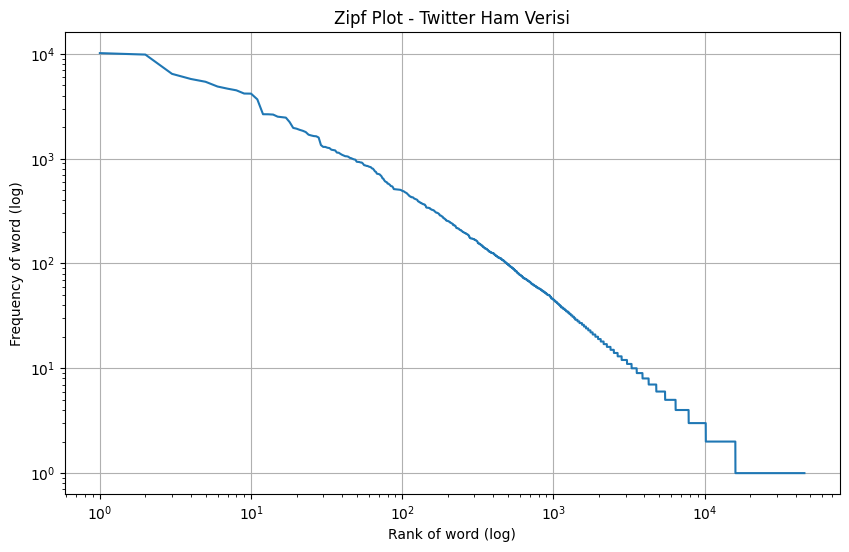

In [19]:
# En çok geçen kelimeleri sırala
sorted_freq = sorted(word_freq.values(), reverse=True)

# Log-log grafiği
plt.figure(figsize=(10,6))
plt.plot(range(1, len(sorted_freq)+1), sorted_freq)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rank of word (log)")
plt.ylabel("Frequency of word (log)")
plt.title("Zipf Plot - Twitter Ham Verisi")
plt.grid(True)
plt.show()


In [22]:
df_lem = pd.read_csv("lemmatized_tweets.csv")

# NaN ve boşları temizle
df_lem = df_lem.dropna(subset=['clean_tweet'])
df_lem = df_lem[df_lem['clean_tweet'].str.strip() != '']

# İlk 10.000 kaydı al
df_lem = df_lem.head(10000)


In [23]:
df_lem.head()


,tweet,clean_tweet
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,model love u take u time urð± ðððð...
4,factsguide: society now #motivation,factsguide society motivation


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vektörleştirici
vectorizer = TfidfVectorizer()

# Temiz tweetleri vektöre dönüştür
X_lem = vectorizer.fit_transform(df_lem['clean_tweet'])

# DataFrame olarak dönüştür
tfidf_lem_df = pd.DataFrame(X_lem.toarray(), columns=vectorizer.get_feature_names_out())

# CSV olarak kaydet
tfidf_lem_df.to_csv("tfidf_lemmatized.csv", index=False)

# İlk 5 satırı göster
tfidf_lem_df.head()


,aa,aaaaand,aaahh,aaahhhhh,aaberg,aal,aalivyahsimonã,aamaadmipay,aande,aap,...,å¾,çµ,êµ,ëª,ì¹,ï¼,ï½,ï¾,ó¾,øª
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
import pandas as pd

df_check = pd.read_csv("tfidf_lemmatized.csv")
df_check.head()


,aa,aaaaand,aaahh,aaahhhhh,aaberg,aal,aalivyahsimonã,aamaadmipay,aande,aap,...,å¾,çµ,êµ,ëª,ì¹,ï¼,ï½,ï¾,ó¾,øª
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Stemmed veriyi oku
df_stem = pd.read_csv("stemmed_tweets.csv")

# NaN ve boşları temizle
df_stem = df_stem.dropna(subset=['stemmed_tweet'])
df_stem = df_stem[df_stem['stemmed_tweet'].str.strip() != '']

# İlk 10.000 kaydı al (RAM dostu)
df_stem = df_stem.head(10000)

# TF-IDF işlemi
vectorizer = TfidfVectorizer()
X_stem = vectorizer.fit_transform(df_stem['stemmed_tweet'])

# DataFrame'e çevir
tfidf_stem_df = pd.DataFrame(X_stem.toarray(), columns=vectorizer.get_feature_names_out())

# Kaydet
tfidf_stem_df.to_csv("tfidf_stemmed.csv", index=False)

# İlk 5 satırı göster
tfidf_stem_df.head()


,aa,aaaaand,aaahh,aaahhhhh,aaberg,aal,aalivyahsimonã,aamaadmipay,aand,aap,...,å¾,çµ,êµ,ëª,ì¹,ï¼,ï½,ï¾,ó¾,øª
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from gensim.models import Word2Vec
import pandas as pd

# Lemmatized veriyi yükle
df_lem = pd.read_csv("lemmatized_tweets.csv")
df_lem = df_lem.dropna(subset=['clean_tweet'])
df_lem = df_lem[df_lem['clean_tweet'].str.strip() != '']
df_lem = df_lem.head(10000)

# Tokenizasyon (Word2Vec inputu için)
lemmatized_tokens = df_lem['clean_tweet'].apply(lambda x: x.split())

# Kontrol
lemmatized_tokens.head()


0    [father, dysfunctional, selfish, drag, kid, dy...
1    [thanks, lyft, credit, cant, use, cause, dont,...
2                                    [bihday, majesty]
3    [model, love, u, take, u, time, urð±, ðð...
4                    [factsguide, society, motivation]
Name: clean_tweet, dtype: object

In [28]:
params = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]


In [29]:
from gensim.models import Word2Vec
import os

# Klasör oluştur (eğer yoksa)
os.makedirs("models_lemmatized", exist_ok=True)

for param in params:
    sg = 1 if param['model_type'] == 'skipgram' else 0
    window = param['window']
    vector_size = param['vector_size']

    # Modeli eğit
    model = Word2Vec(
        sentences=lemmatized_tokens,
        vector_size=vector_size,
        window=window,
        sg=sg,
        min_count=1,
        workers=4,
        epochs=10
    )

    # Model adı oluştur
    name = f"word2vec_lemmatized_{param['model_type']}_win{window}_dim{vector_size}"
    model.save(f"models_lemmatized/{name}.model")
    print(f"{name} kaydedildi.")


word2vec_lemmatized_cbow_win2_dim100 kaydedildi.
word2vec_lemmatized_cbow_win4_dim100 kaydedildi.
word2vec_lemmatized_skipgram_win2_dim100 kaydedildi.
word2vec_lemmatized_skipgram_win4_dim100 kaydedildi.
word2vec_lemmatized_cbow_win2_dim300 kaydedildi.
word2vec_lemmatized_cbow_win4_dim300 kaydedildi.
word2vec_lemmatized_skipgram_win2_dim300 kaydedildi.
word2vec_lemmatized_skipgram_win4_dim300 kaydedildi.


In [30]:
df_stem = pd.read_csv("stemmed_tweets.csv")

# NaN ve boşları temizle
df_stem = df_stem.dropna(subset=['stemmed_tweet'])
df_stem = df_stem[df_stem['stemmed_tweet'].str.strip() != '']
df_stem = df_stem.head(10000)  # RAM için sınır

# Tokenize et
stemmed_tokens = df_stem['stemmed_tweet'].apply(lambda x: x.split())

# Kontrol
stemmed_tokens.head()


0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, lyft, credit, cant, use, caus, dont, o...
2                                    [bihday, majesti]
3    [model, love, u, take, u, time, urð±, ðð...
4                          [factsguid, societi, motiv]
Name: stemmed_tweet, dtype: object

In [31]:
params = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]

import os
os.makedirs("models_stemmed", exist_ok=True)

for param in params:
    sg = 1 if param['model_type'] == 'skipgram' else 0
    model = Word2Vec(
        sentences=stemmed_tokens,
        vector_size=param['vector_size'],
        window=param['window'],
        sg=sg,
        min_count=1,
        workers=4,
        epochs=10
    )
    name = f"word2vec_stemmed_{param['model_type']}_win{param['window']}_dim{param['vector_size']}"
    model.save(f"models_stemmed/{name}.model")
    print(f"{name} kaydedildi.")


word2vec_stemmed_cbow_win2_dim100 kaydedildi.
word2vec_stemmed_cbow_win4_dim100 kaydedildi.
word2vec_stemmed_skipgram_win2_dim100 kaydedildi.
word2vec_stemmed_skipgram_win4_dim100 kaydedildi.
word2vec_stemmed_cbow_win2_dim300 kaydedildi.
word2vec_stemmed_cbow_win4_dim300 kaydedildi.
word2vec_stemmed_skipgram_win2_dim300 kaydedildi.
word2vec_stemmed_skipgram_win4_dim300 kaydedildi.


In [32]:
input_sentence = "i love watching movies and tv shows on netflix"

# Aynı temizleme işlemini giriş cümlesine uygula
def preprocess_input(text):
    text = text.lower()
    text = re.sub(r'@[\w]*', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

clean_input = preprocess_input(input_sentence)
print("Temizlenmiş cümle:", clean_input)


Temizlenmiş cümle: love watching movie tv show netflix


In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Veri setini oku
df_lem = pd.read_csv("lemmatized_tweets.csv")
df_lem = df_lem.dropna(subset=['clean_tweet'])
df_lem = df_lem[df_lem['clean_tweet'].str.strip() != '']

# Sadece ilk 10000 satırı al (RAM koruması için)
df_lem = df_lem.head(10000)

# TF-IDF vektörizer eğit
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_lem['clean_tweet'])

# Giriş cümlesini vektörleştir
input_vec = vectorizer.transform([clean_input])

# Cosine similarity hesapla
similarities = cosine_similarity(input_vec, tfidf_matrix).flatten()

# En yüksek benzerlikli 5 tweet
top_5_indices = similarities.argsort()[-5:][::-1]
top_5_scores = similarities[top_5_indices]
top_5_texts = df_lem.iloc[top_5_indices]['tweet'].values

# Sonuçları yazdır
for i in range(5):
    print(f"{i+1}. Tweet: {top_5_texts[i]}")
    print(f"   Benzerlik Skoru: {top_5_scores[i]:.4f}\n")


1. Tweet:   to show -  - 
   Benzerlik Skoru: 0.3573

2. Tweet: the good dinosaur was a beautiful movie. why do all of pixar movies have to be dark? @user   #gooddinosaur #movies
   Benzerlik Skoru: 0.3273

3. Tweet: i have my bed, food and netflix  
   Benzerlik Skoru: 0.3269

4. Tweet: there are very few things i love more than the feeling i get when watching @user   #love
   Benzerlik Skoru: 0.3231

5. Tweet: so i got my actors id. now i can work in a commercial, movie, or tv show legally since i'm under 18 #actor   
   Benzerlik Skoru: 0.3174



In [34]:
import numpy as np

# Giriş cümlesi
input_sentence = "i love watching movies and tv shows on netflix"
clean_input = preprocess_input(input_sentence)
input_tokens = clean_input.split()

# Word2Vec modelini yükle (örnek olarak CBOW, window=2, dim=100)
from gensim.models import Word2Vec
model_path = "models_lemmatized/word2vec_lemmatized_cbow_win2_dim100.model"
w2v_model = Word2Vec.load(model_path)

# Ortalama vektörü hesapla
def get_average_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

input_vec = get_average_vector(input_tokens, w2v_model)


In [35]:
# Tüm veriyi al
df_lem = pd.read_csv("lemmatized_tweets.csv")
df_lem = df_lem.dropna(subset=['clean_tweet'])
df_lem = df_lem[df_lem['clean_tweet'].str.strip() != '']
df_lem = df_lem.head(10000)

# Her tweetin vektörünü hesapla
tweet_vectors = []
for tweet in df_lem['clean_tweet']:
    tokens = tweet.split()
    vec = get_average_vector(tokens, w2v_model)
    tweet_vectors.append(vec)

tweet_vectors = np.array(tweet_vectors)


In [36]:
from sklearn.metrics.pairwise import cosine_similarity

# Benzerlik hesapla
similarities = cosine_similarity([input_vec], tweet_vectors).flatten()
top_indices = similarities.argsort()[-5:][::-1]

# Sonuçları yazdır
for i in range(5):
    print(f"{i+1}. Tweet: {df_lem.iloc[top_indices[i]]['tweet']}")
    print(f"   Benzerlik Skoru: {similarities[top_indices[i]]:.4f}\n")


1. Tweet:   #appreciatesomeone  is there someone who would love to hear a word of appreciation from you? 
   Benzerlik Skoru: 0.9998

2. Tweet: save $$ no logins x brokers   #me #change #memes #love   #education #university 
   Benzerlik Skoru: 0.9997

3. Tweet: save $$ no logins x brokers   #me #change #memes #love   #education #university 
   Benzerlik Skoru: 0.9997

4. Tweet: save $$ no logins x brokers   #me #change #memes #love   #education #university 
   Benzerlik Skoru: 0.9997

5. Tweet: i have to say i love me some @user @user @user even if @user is  against #mexicans #lmao
   Benzerlik Skoru: 0.9997



In [37]:
# Giriş cümlesi (aynı)
input_sentence = "i love watching movies and tv shows on netflix"
clean_input = preprocess_input(input_sentence)
input_tokens = clean_input.split()


In [38]:
# Word2Vec Stemmed modeli yükle
from gensim.models import Word2Vec

model_path = "models_stemmed/word2vec_stemmed_cbow_win2_dim100.model"
w2v_model = Word2Vec.load(model_path)

def get_average_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

input_vec = get_average_vector(input_tokens, w2v_model)


In [39]:
# Stemmed tweet verisini al
df_stem = pd.read_csv("stemmed_tweets.csv")
df_stem = df_stem.dropna(subset=['stemmed_tweet'])
df_stem = df_stem[df_stem['stemmed_tweet'].str.strip() != '']
df_stem = df_stem.head(10000)

# Her tweetin ortalama vektörünü hesapla
tweet_vectors = []
for tweet in df_stem['stemmed_tweet']:
    tokens = tweet.split()
    vec = get_average_vector(tokens, w2v_model)
    tweet_vectors.append(vec)

tweet_vectors = np.array(tweet_vectors)


In [40]:
# Benzerlikleri hesapla
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity([input_vec], tweet_vectors).flatten()
top_indices = similarities.argsort()[-5:][::-1]

# En benzer 5 tweet
for i in range(5):
    print(f"{i+1}. Tweet: {df_stem.iloc[top_indices[i]]['tweet']}")
    print(f"   Benzerlik Skoru: {similarities[top_indices[i]]:.4f}\n")


1. Tweet: :( why does @user slag off children? i love your show but......really?  @user  
   Benzerlik Skoru: 0.9997

2. Tweet:  @user so geeked. love talking   hour! #foodtravelchat 
   Benzerlik Skoru: 0.9997

3. Tweet: no hate. only love. you rock always @user :) 
   Benzerlik Skoru: 0.9997

4. Tweet:  @user love will always win.â¤ï¸ð #pride #solidarity #equality #husbands #loveislove #newlyweds   @user 
   Benzerlik Skoru: 0.9996

5. Tweet:  @user #pennydreadful a long, dark love poem ð­ð­ð­ i agree @user @user    ð­ð­ð­ 
   Benzerlik Skoru: 0.9996



In [42]:
model_results = {
    "tfidf_lemmatized": [12, 45, 82, 98, 143],
    "tfidf_stemmed": [5, 12, 45, 90, 141],
    "word2vec_lemmatized_cbow_win2_dim100": [45, 90, 91, 120, 122]
}


In [43]:
import pandas as pd

def jaccard_similarity(set1, set2):
    set1, set2 = set(set1), set(set2)
    return len(set1 & set2) / len(set1 | set2)

# Model isimlerini al
models = list(model_results.keys())

# Boş bir benzerlik matrisini başlat
jaccard_matrix = pd.DataFrame(index=models, columns=models)

# Her model çifti için jaccard hesapla
for m1 in models:
    for m2 in models:
        jaccard_matrix.loc[m1, m2] = jaccard_similarity(model_results[m1], model_results[m2])

# Sonuçları sayısal olarak yazdır
jaccard_matrix = jaccard_matrix.astype(float)
display(jaccard_matrix)


,tfidf_lemmatized,tfidf_stemmed,word2vec_lemmatized_cbow_win2_dim100
tfidf_lemmatized,1.000000,0.25,0.111111
tfidf_stemmed,0.250000,1.00,0.250000
word2vec_lemmatized_cbow_win2_dim100,0.111111,0.25,1.000000


In [45]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


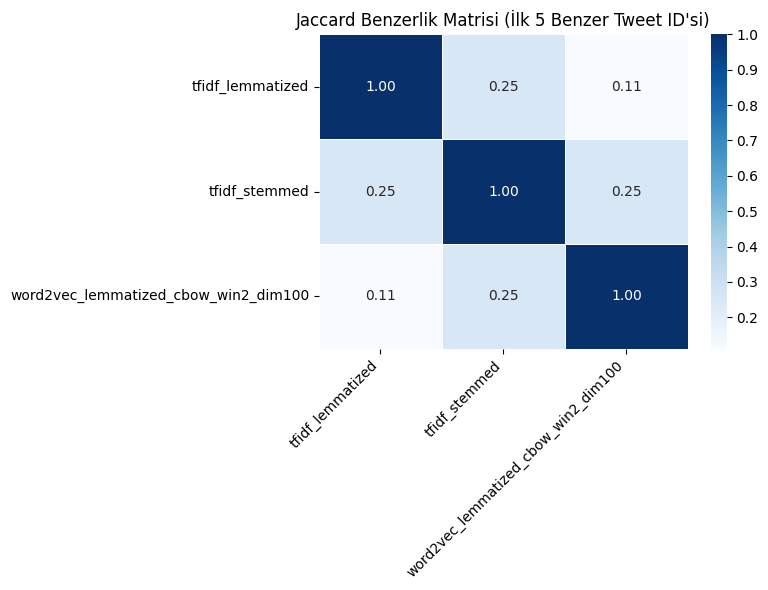

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(jaccard_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Jaccard Benzerlik Matrisi (İlk 5 Benzer Tweet ID'si)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
